# Week 6 Seminar Answers

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [2]:
data = yf.download("AMZN TSLA", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  2 of 2 completed


In [3]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2022-02-22  3003.949951  821.530029  3003.949951  821.530029  3059.649902   
2022-02-23  2896.540039  764.039978  2896.540039  764.039978  3035.260010   
2022-02-24  3027.159912  800.770020  3027.159912  800.770020  3034.979980   
2022-02-25  3075.770020  809.869995  3075.770020  809.869995  3079.800049   
2022-02-28  3071.260010  870.429993  3071.260010  870.429993  3089.000000   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2022-02-22  856.729980  2969.709961  801.099976  3009.570068  834.130005   
2022-02-23  835.299988  2893.020020  760.559998  3033.010010  830.429993   
2022-02-24  802.479980  2790.000000  700.000000  2796.750000  700.390015   
2022-02-25  819.500000  2984.270020  782.400024  3011.000000  809.229980   
2022-02-28  876.859985  3017.000000  814.710022  3048.500000  815.010010   

             Volume            
               AMZN      TSLA  
Date                           
2022-02-22  3306400  27762700  
2022-02-23  3212200  31752300  
2022-02-24  5039300  45107400  
2022-02-25  3119800  25355900  
2022-02-28  2878500  33002300

## Question 2

In [4]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-01 to 2022-02-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    253 non-null    float64
 1   TSLA    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

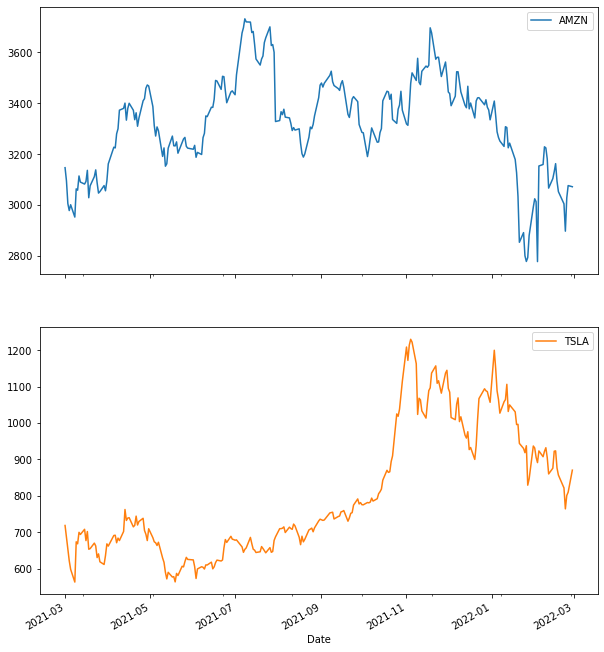

In [5]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [6]:
ADJ.describe().round(2)

,AMZN,TSLA
count,253.00,253.00
mean,3322.02,800.88
std,189.86,174.97
min,2776.91,563.00
25%,3221.00,668.06
50%,3335.55,734.09
75%,3448.14,931.25
max,3731.41,1229.91


In [7]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2021-03-01,NaN,NaN
2021-03-02,-0.0165,-0.0455
2021-03-03,-0.0294,-0.0496
2021-03-04,-0.0092,-0.0498
2021-03-05,0.0077,-0.0385


## Question 4

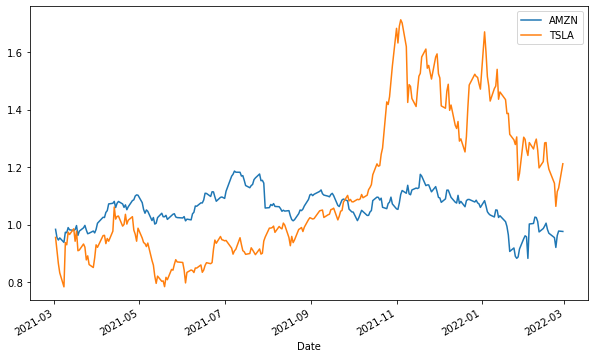

In [8]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [9]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2022-02-22,3003.949951
2022-02-23,2896.540039
2022-02-24,3027.159912
2022-02-25,3075.770020
2022-02-28,3071.260010


In [10]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2022-02-22,3003.949951,3030.403516,3238.535852
2022-02-23,2896.540039,3035.244519,3228.402185
2022-02-24,3027.159912,3047.730017,3219.495349
2022-02-25,3075.770020,3061.881018,3212.307015
2022-02-28,3071.260010,3071.466016,3206.099349


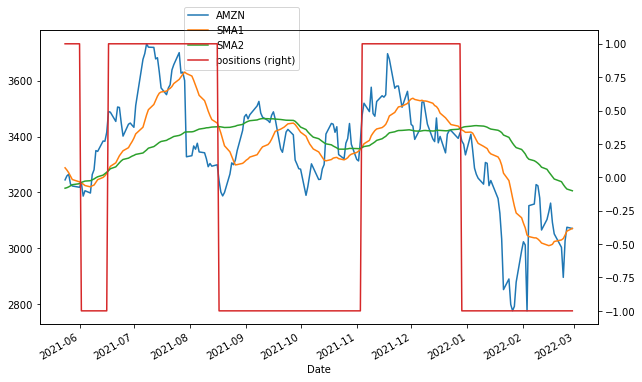

In [11]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

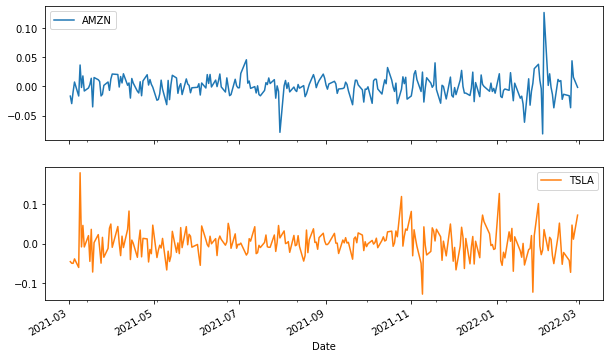

In [12]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

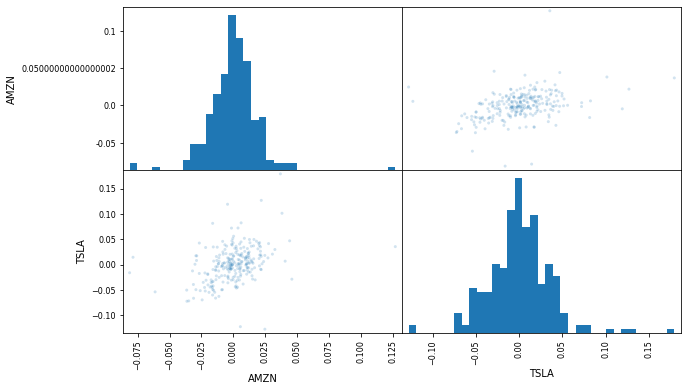

In [13]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

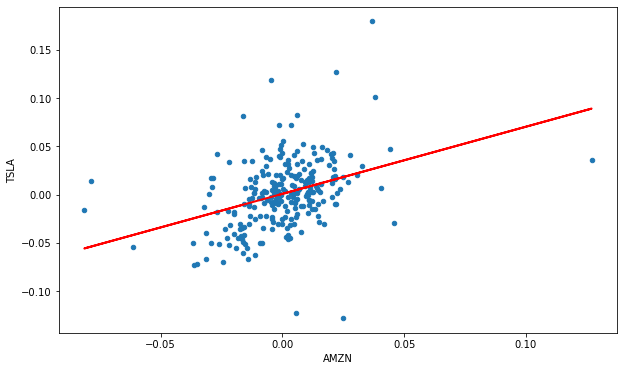

In [14]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [15]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.365306
TSLA,0.365306,1.000000


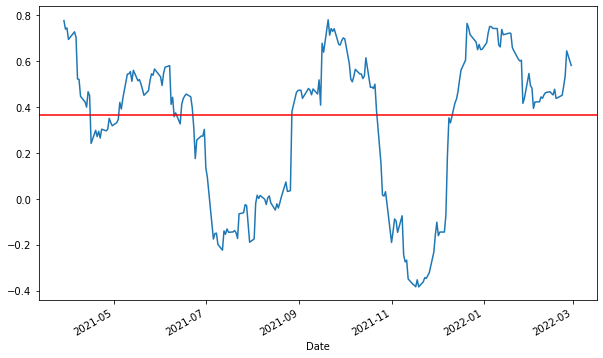

In [16]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');